In [112]:
#Q1 week2
import pandas as pd
import numpy as np
cancer_data=pd.read_csv("C:/Users/user/Desktop/AIML_BC/Breast-Cancer-Detection-using-Machine-Learning-master/cancer dataset.csv")

cancer_data.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [113]:
#Q1 week2 
column_names=cancer_data.columns
print("The dependent variable is '{}' \n\n The independent variables are\n\n {}".format(column_names[1],np.array(column_names[2:])))

The dependent variable is 'diagnosis' 

 The independent variables are

 ['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']


In [115]:
#Q2 week2: statistical parameters of the data
stats=cancer_data.describe()
#print(stats.loc[:,'radius_mean':'fractal_dimension_worst'])
print(stats.iloc[:,1:])



       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [116]:
#Q3: week2
print ("The shape of the dataset is {}".format(cancer_data.shape))

The shape of the dataset is (569, 32)


In [117]:
#Q4-week2
miss_vals=cancer_data.isna()
#print(miss_vals['diagnosis'].value_counts())
#print(miss_vals.columns)

miss_list=[]
for col in miss_vals.columns:
    for item in miss_vals[col]:
        if item==True:
            miss_list.append(col)
            break
if len(miss_list)==0:
    print("There are no missing values")
else:
    print ("There are missing values")
    print ("The following columns have missing values")
            
    for col_names in miss_list:
        print(col_names)
        
        

There are no missing values


In [118]:
#Q5-week2
res=cancer_data['diagnosis'].value_counts()
print ("There are {} Benign and {} Malignant cases".format(res[0],res[1]))

There are 357 Benign and 212 Malignant cases


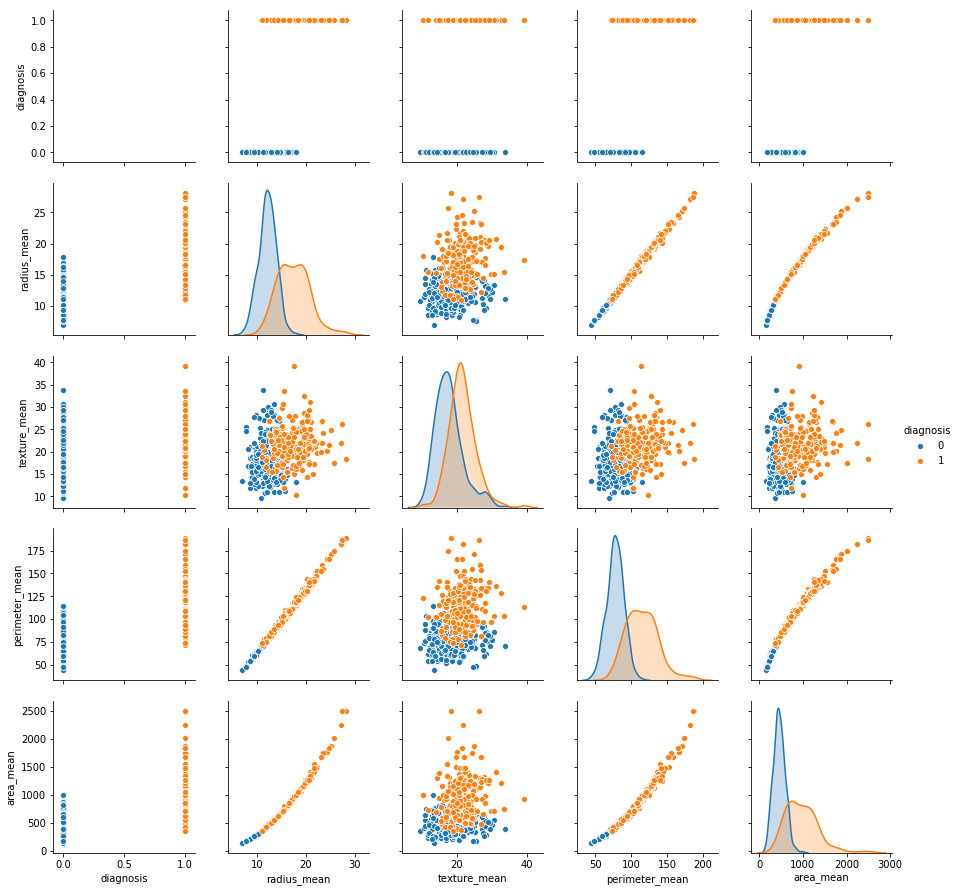

In [119]:
#Q6-week2

from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
cancer_data.iloc[:,1]=labelencoder_Y.fit_transform(cancer_data.iloc[:,1].values)
#cancer_data['diagnosis']
import seaborn as sns
cancer_data_reduced=cancer_data.iloc[:,0:6]
cancer_data_reduced.set_index('id',inplace=True)
#cancer_data_reduced.head()
sns.pairplot(cancer_data_reduced,hue='diagnosis')

#Findings from pairplots

From the pairplots we can see that there exists relationship between the type of cancer and the independent variables(radius_mean,perimeter_mean,area_mean). i.e When the value of these independent variables are lower, the cancer is benign and when the value is high the cancer is malignant. The variable 'Texture mean' is not showing any clear realtionship to the type of cancer. And we can also see that 'radius_mean,perimeter_mean,area_mean' are linearly related to each other.

In [120]:
#Q7-week2
cor_rel=cancer_data_reduced.corr()
cor_rel

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000


#Findings from correlation matrix

We see that the independent variable diagnosis is correlated to radius mean,perimeter_mean and area_mean.
Radius mean, perimeter_mean and area_mean are strongly correlated to each other.
'Texture_mean' shows weak correlation with other variables.
There are no negative correlation here.
We omit the features which are very strongly correlated, to avoid multi collinrarity problem.

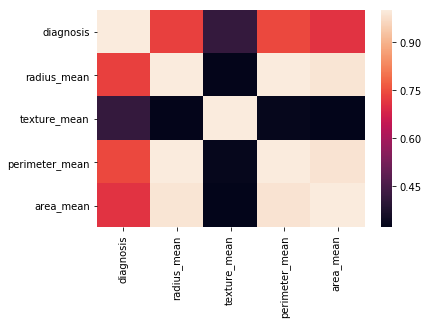

In [121]:
#Q8-week2
sns.heatmap(cor_rel)